## HLS channels

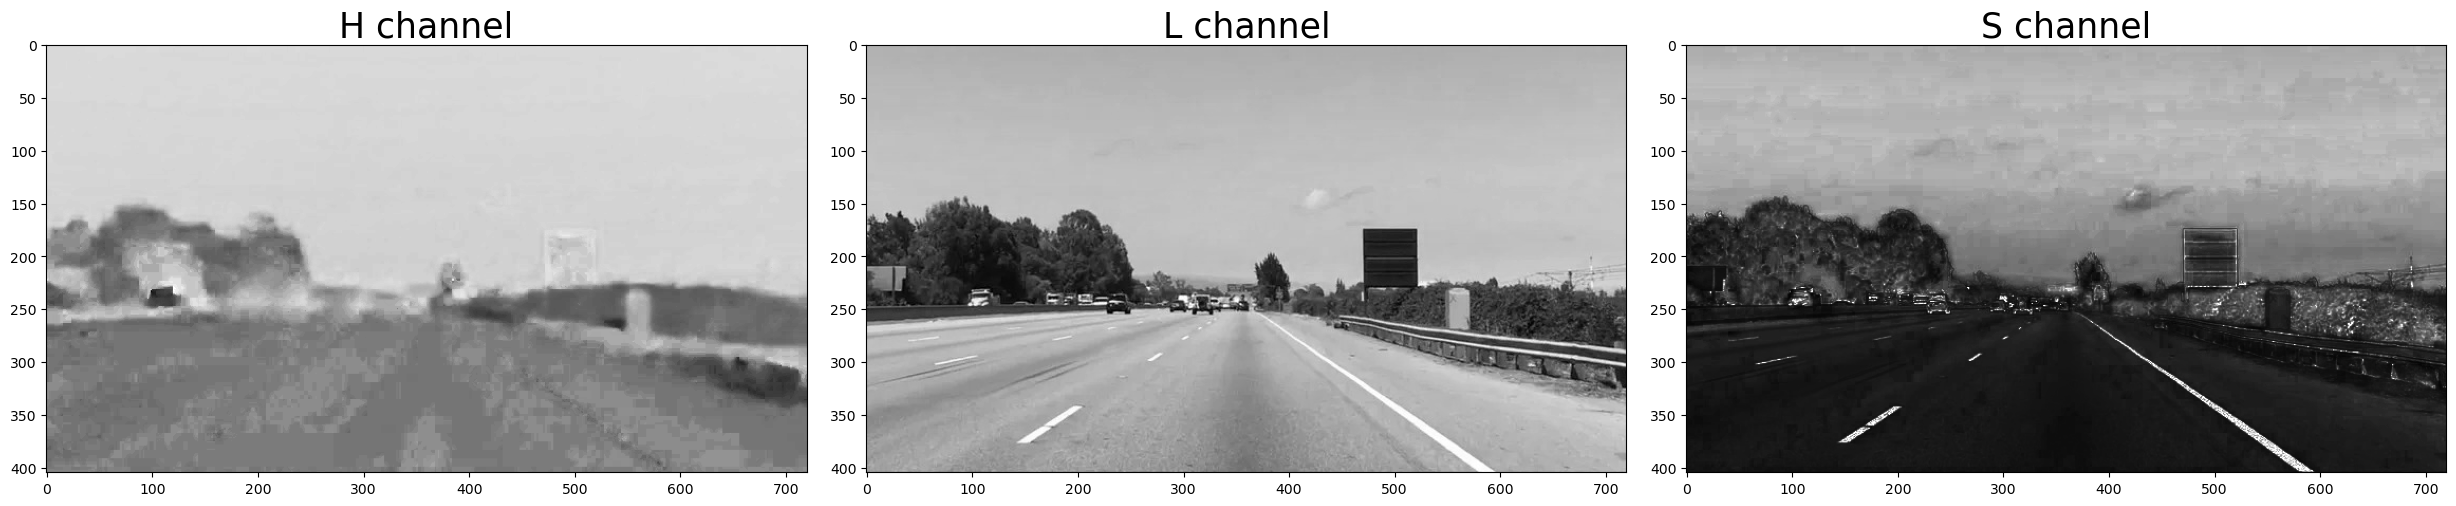

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('../testimage.jpg')

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(hls[:,:,0], cmap='gray')
ax1.set_title('H channel', fontsize=25)
ax2.imshow(hls[:,:,1], cmap='gray')
ax2.set_title('L channel', fontsize=25)
ax3.imshow(hls[:,:,2], cmap='gray')
ax3.set_title('S channel', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)

## color thresholding

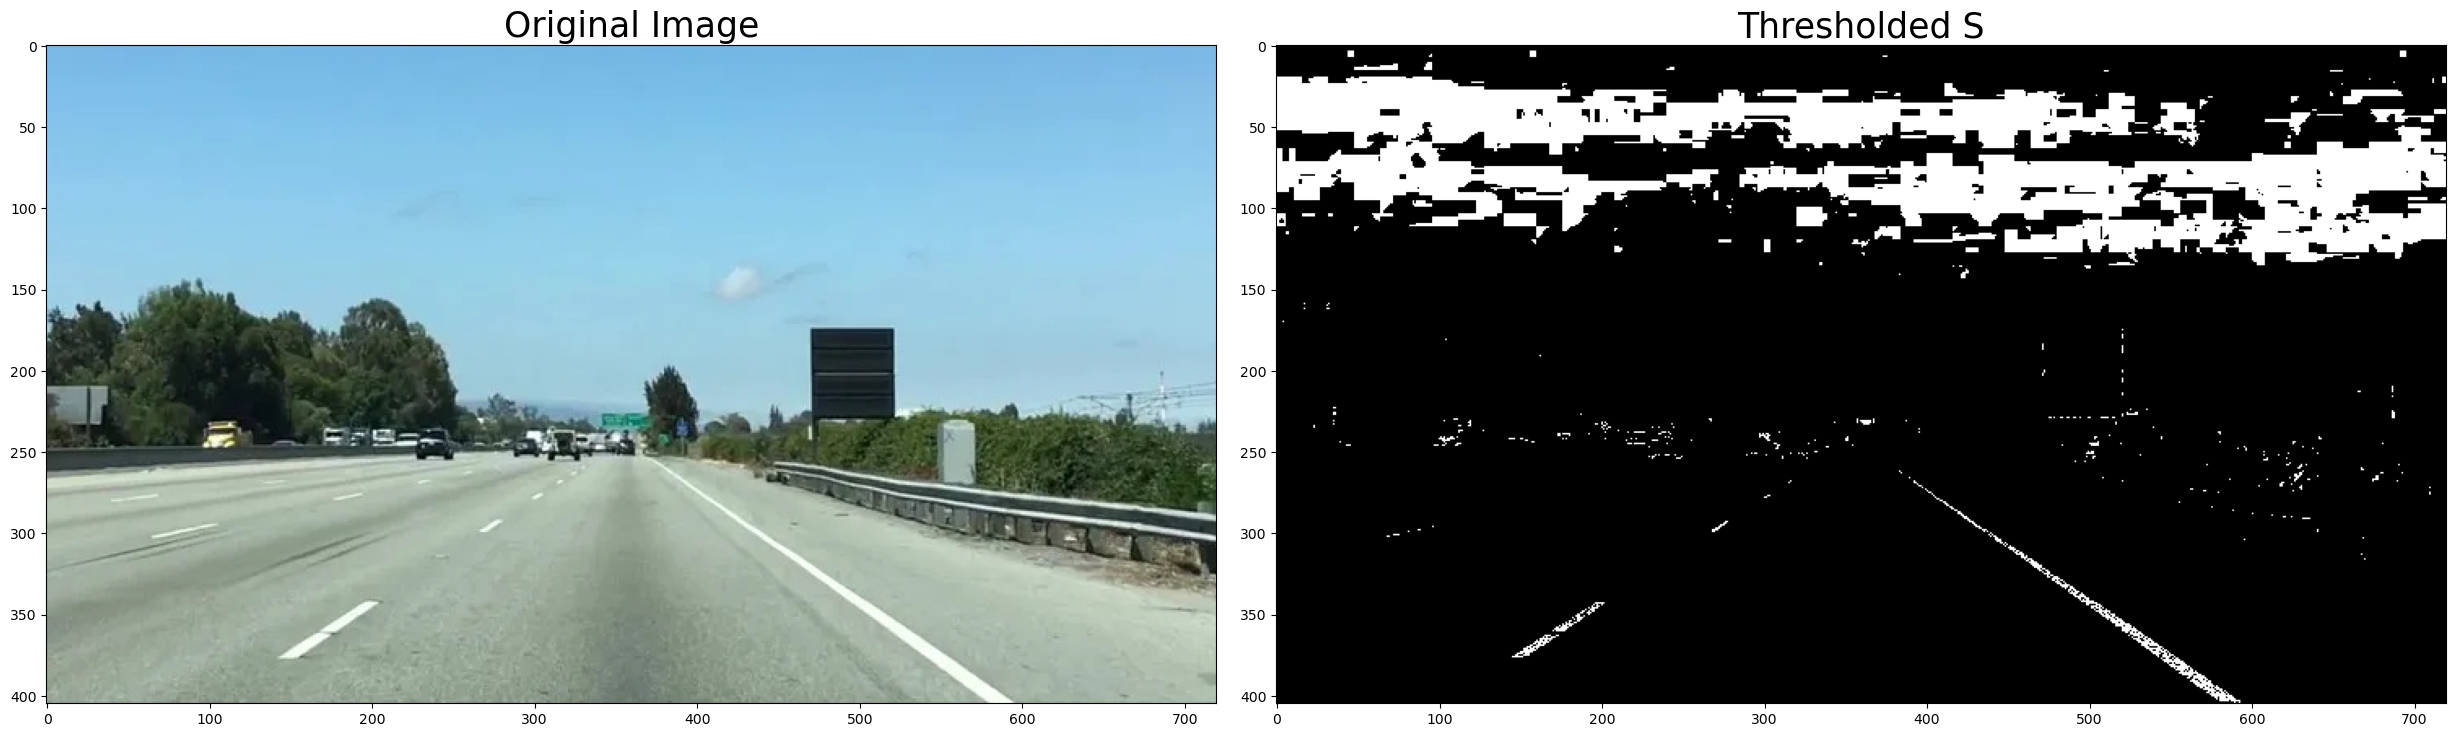

In [2]:
image = mpimg.imread('../testimage.jpg')
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    binary_output = np.zeros_like(hls[:,:,2])
    binary_output[(hls[:,:,2] > thresh[0]) & (hls[:,:,2] <= thresh[1])] = 1
    return binary_output
    
hls_binary = hls_select(image, thresh=(180, 255))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Region Masking

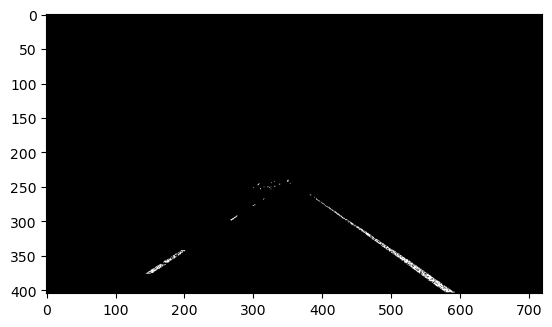

In [3]:
height, width= hls_binary.shape
ROI_polygon= np.array([[(100,height),(330,230),(650,height)]], dtype= np.int32)
blank_image= np.zeros_like(hls_binary)
ROI_white= cv2.fillPoly(blank_image, ROI_polygon,255)
ROI_image= cv2.bitwise_and(hls_binary, ROI_white)
plt.imshow(ROI_image,cmap='gray')

## Edge detection

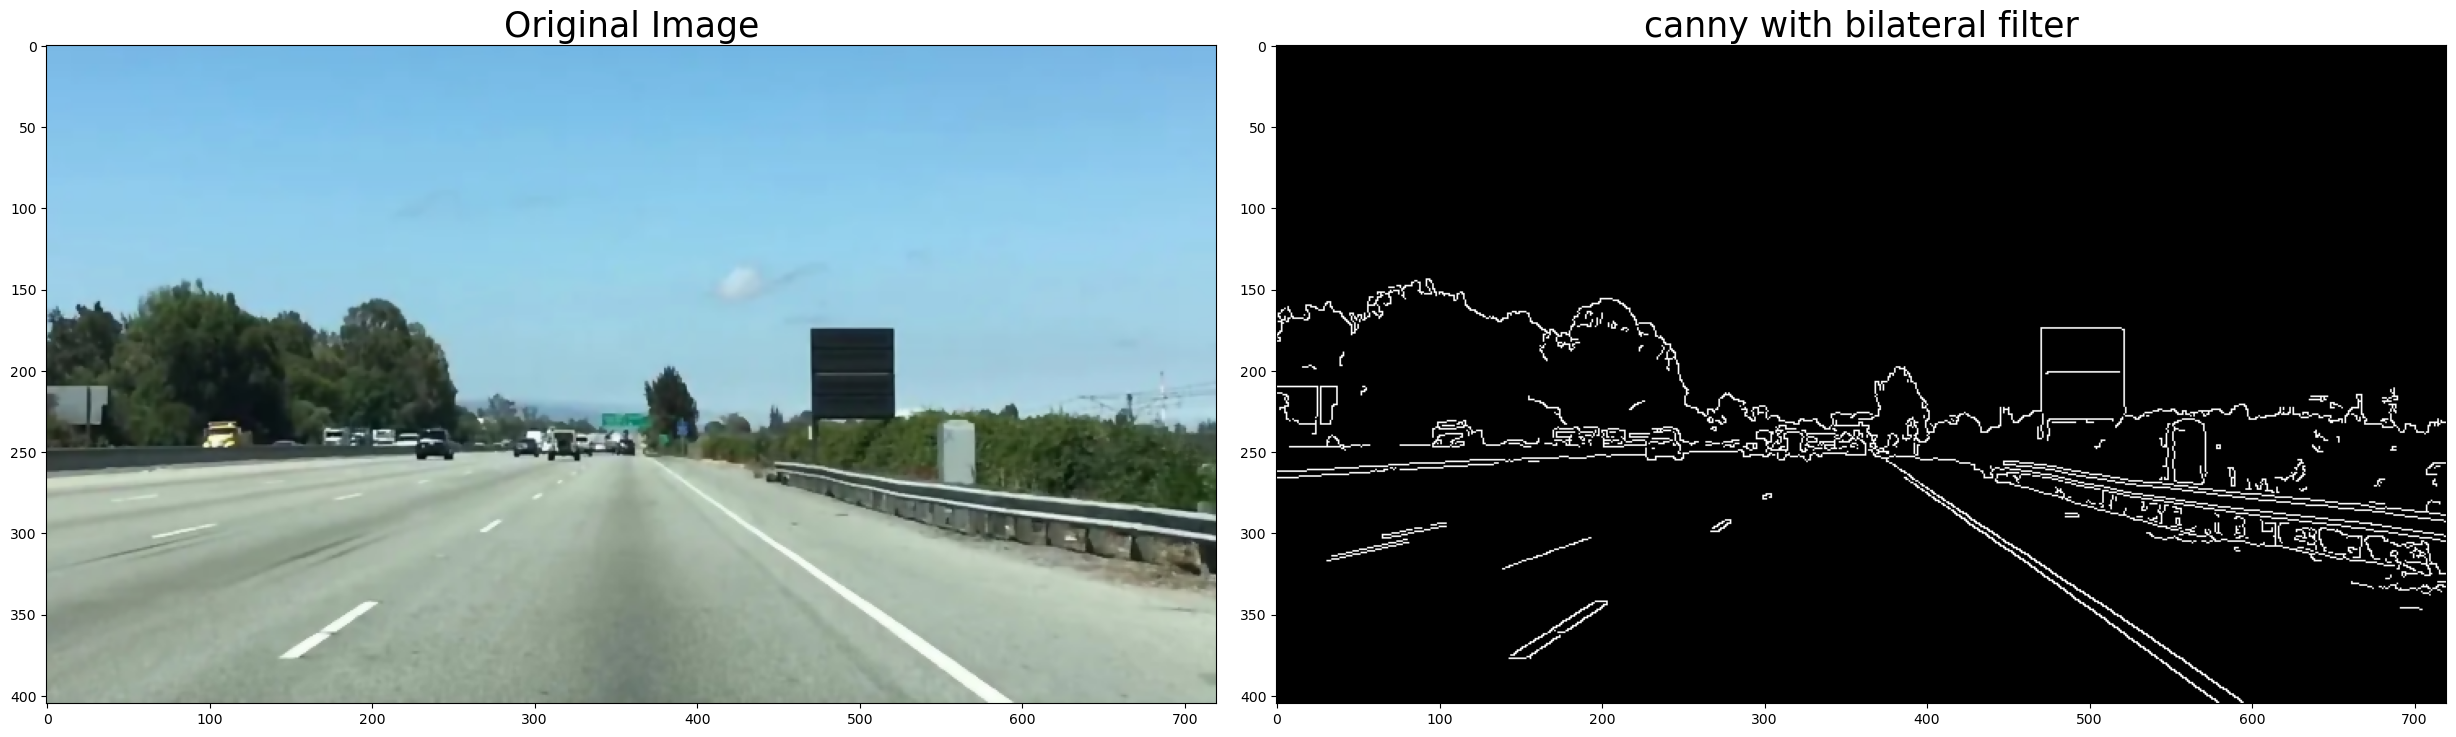

In [22]:
image = mpimg.imread('../testimage.jpg')
image = cv2.bilateralFilter(image,5,75,75)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(gray_image,100,200)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(edge_image, cmap='gray')
ax2.set_title('canny with bilateral filter', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

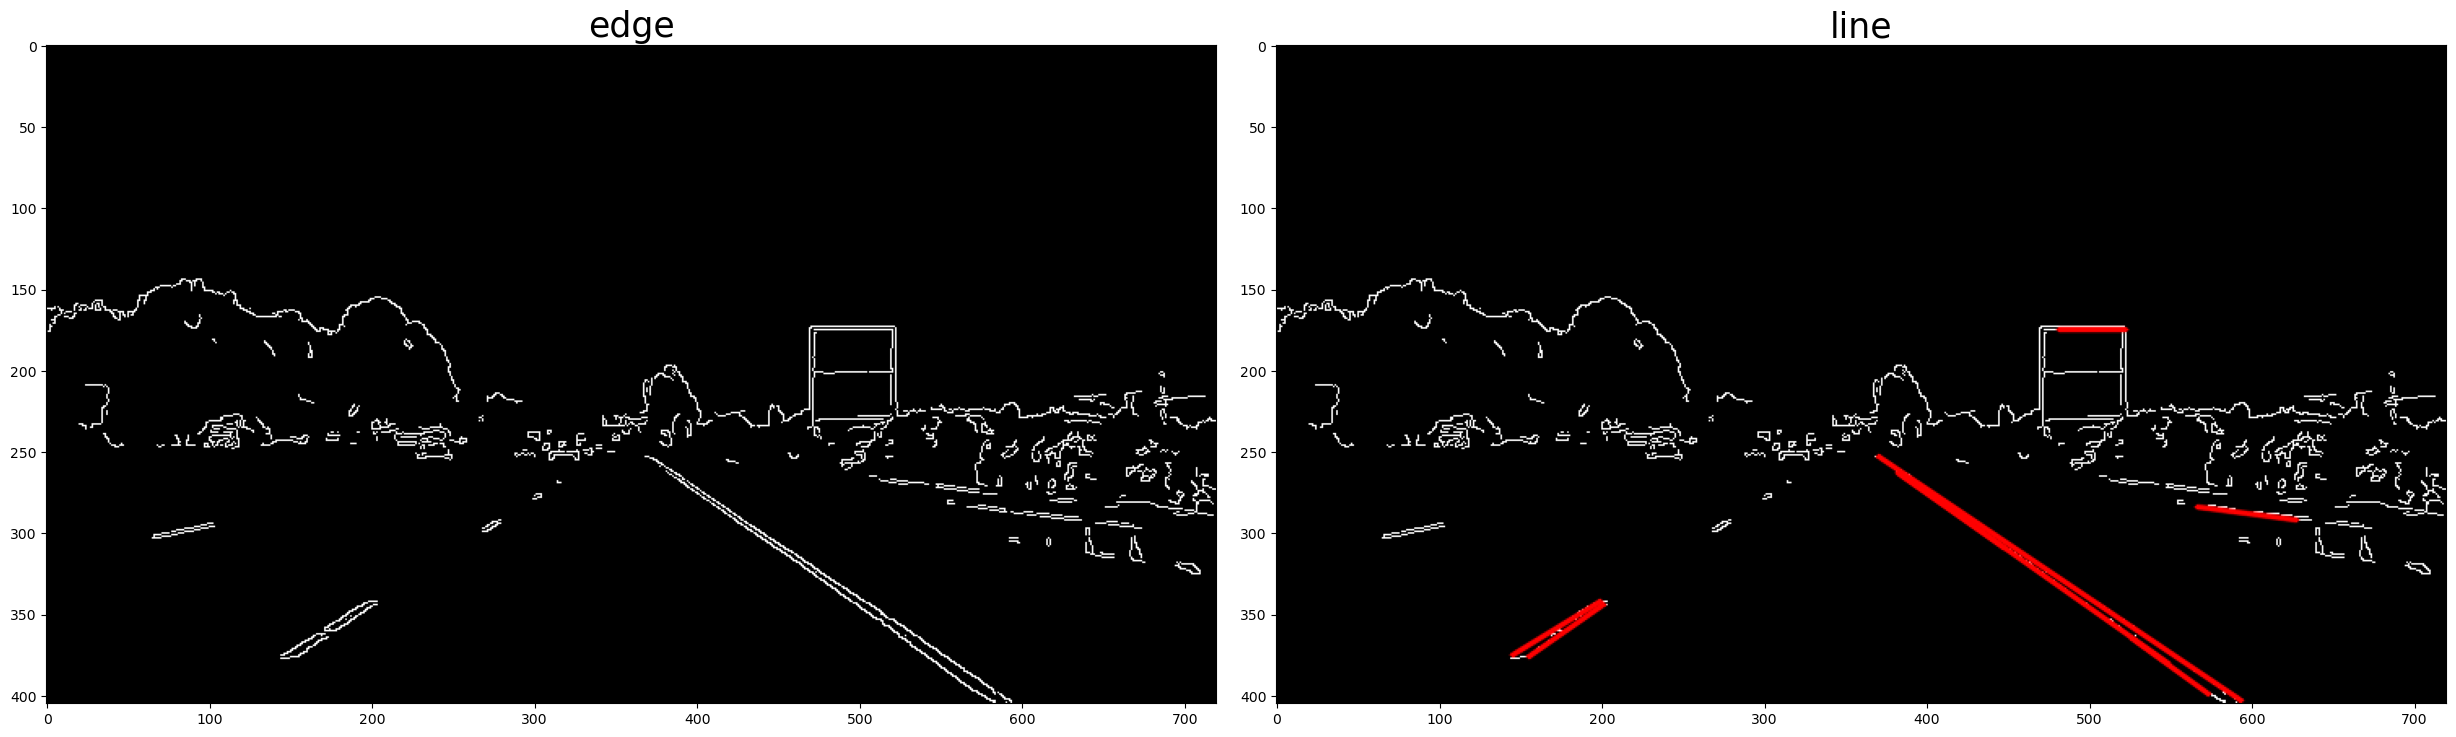

In [121]:
import sys
import math
import cv2 
import numpy as np

image = mpimg.imread('../testimage.jpg')
S_image = cv2.bilateralFilter(image,5,75,75)

S_channel_image = cv2.cvtColor(S_image, cv2.COLOR_RGB2HLS)[:,:,2]

edge_image = cv2.Canny(S_channel_image, 100, 200)

# Copy edges to the images that will display the results in BGR
cdstP = cv2.cvtColor(edge_image, cv.COLOR_GRAY2BGR)


linesP = cv2.HoughLinesP(edge_image, 3, np.pi/180, threshold=100, minLineLength=40, maxLineGap=5)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 2, cv2.LINE_AA)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(edge_image,cmap='gray')
ax1.set_title('edge', fontsize=25)
ax2.imshow(cdstP, cmap='gray')
ax2.set_title('line', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)